# Unit 5 - Financial Planning

In [66]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [67]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [68]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [69]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [70]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49069.20
The current value of your 5.3 ETH is $16149.95


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [71]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [72]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_api_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_api_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [73]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
my_portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = my_portfolio_df[my_portfolio_df["symbol"]=="AGG"].drop("symbol",axis=1)
SPY = my_portfolio_df[my_portfolio_df["symbol"]=="SPY"].drop("symbol",axis=1)

# Concatenate the ticker DataFrames
my_portfolio_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

my_portfolio_df.index=my_portfolio_df.index.date

# Preview DataFrame
my_portfolio_df

AGG                                                           \
              open     high    low   close   volume trade_count        vwap   
2021-04-12  114.14  114.172  114.0  114.15  3480048       13809  114.110754   

               SPY                                                           
              open    high    low   close    volume trade_count        vwap  
2021-04-12  410.86  411.93  410.2  411.64  55018968      326532  411.176191

In [74]:
# Pick AGG and SPY close prices
agg_closing = float(my_portfolio_df["AGG"]["close"])
spy_closing = float(my_portfolio_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing}")
print(f"Current SPY closing price: ${spy_closing}")

Current AGG closing price: $114.15
Current SPY closing price: $411.64


In [75]:
# Compute the current value of shares
agg_value=agg_closing*my_agg
spy_value=spy_closing*my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${agg_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${spy_value:0.2f}")

The current value of your 50 SPY shares is $22830.00
The current value of your 200 AGG shares is $20582.00


### Savings Health Analysis

In [76]:
# Set monthly household income
monthly_income = 12000
crypto= my_btc_value+my_eth_value
shares= agg_value+spy_value

# Consolidate financial assets data
df_savings_data = {"amount_in_dollars":(crypto,shares)}


# Create savings DataFrame
df_savings = pd.DataFrame(df_savings_data, columns=["amount_in_dollars"], index = ["crypto", "shares"])

# Display savings DataFrame
df_savings

,amount_in_dollars
crypto,65219.148
shares,43412.000


<AxesSubplot:title={'center':'Savings'}, ylabel='amount_in_dollars'>

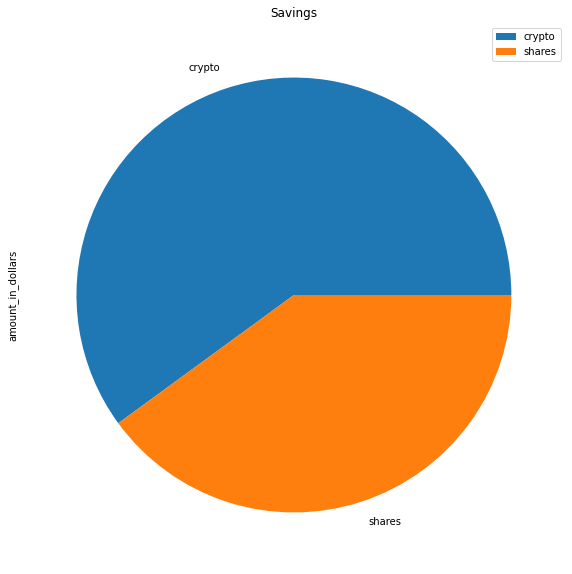

In [77]:
# Plot savings pie chart
df_savings.plot.pie(y="amount_in_dollars", title="Savings", figsize= (20,10))

In [78]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
my_savings = shares+crypto

# Validate saving health
if my_savings>emergency_fund:
    print("Congratulations for having enough money in this fund")
elif my_savings==emergency_fund:
    print("Congratulations for reaching your financial goal")
else:
    print(f"Warning! You're ${emergency_fund-monthly_income} away from reaching your goal")


Congratulations for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [79]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [80]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1Day"

# Reorganize the DataFrame
# Separate ticker data
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

AGG=df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol",axis=1)
SPY=df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol",axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                           SPY                                                 \
                  vwap    open    high     low   close     volume trade_count   
2016-05-02  110.627199  206.90  208.18  206.41  208.03   61908515      263580   
2016-05-03  110.865995  206.50  206.80  205.28  206.13  106422142      377518   
2016-05-04  110.879063  205.00  205.85  204.42  204.96   92199810      345261   
2016-05-05  111.028363  205.57  205.98  204.47  204.95   67597222      280622   
2016-05-06  111.031967  204.04  205.77  203.88  205.70   89131004      340335   

                        
                  vwap  
2016-05-02  207.294812  
2016-05-03  206.312060  
2016-05-04  205.090172  
2016-05-05  205.141555  
2016-05-06  204.937074

In [81]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forty_sixty = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation =100,
    num_trading_days = 252*30
)

In [82]:
# Printing the simulation input data
MC_forty_sixty.portfolio_data

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   
...            ...       ...       ...     ...      ...         ...   
2021-04-26  114.74  114.8015  114.6500  114.65  3480337       13521   
2021-04-27  114.60  115.1300  114.3700  114.37  3820640       12720   
2021-04-28  114.45  114.4685  114.2000  114.43  7075831       24303   
2021-04-29  114.14  114.3700  114.0900  114.37  6208142       21096   
2021-04-30  114.41  114.5150  114.3300  114.49  6469432       19582   

                                        SPY                            \
                  vwap daily_return    open    high       low   close   
2016-05-02  110.627199          NaN  206.90  208.18  206.4100  208.03   
2016-05-03  110.865995     0.001808  206.50  206.80  205.2800  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.4200  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.4700  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.8800  205.70   
...                ...          ...     ...     ...       ...     ...   
2021-04-26  114.706244    -0.000871  417.42  418.22  416.8111  417.61   
2021-04-27  114.498315    -0.002442  417.97  418.14  416.3000  417.52   
2021-04-28  114.379810     0.000525  417.84  419.01  416.9000  417.40   
2021-04-29  114.250702    -0.000524  420.38  420.72  416.4400  420.06   
2021-04-30  114.456246     0.001049  417.67  418.54  416.3400  417.30   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659  
...               ...         ...         ...          ...  
2021-04-26   52076360      295872  417.505200     0.002088  
2021-04-27   50324187      296302  417.481280    -0.000216  
2021-04-28   50692843      330050  417.742098    -0.000287  
2021-04-29   77056617      443399  418.825111     0.006373  
2021-04-30   84731942      478844  417.651995    -0.006570  

[1259 rows x 16 columns]

In [83]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forty_sixty.calc_cumulative_return()

#MC_AAG.calc_cumulative_return()
#MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008641,1.007982,0.999113,0.985832,1.003979,0.995874,1.018717,0.985659,1.015000,1.006067,...,1.001967,1.001575,1.002430,1.005441,1.003553,0.996816,0.995207,0.996758,0.996208,0.999637
2,1.006056,1.005225,1.003777,0.980597,1.009041,0.997303,1.023152,0.987500,1.022556,1.018695,...,1.012574,1.009132,0.998462,1.012416,1.005087,0.988514,0.994781,1.010699,1.002889,1.007457
3,1.002373,1.011036,1.006562,0.970821,1.019738,1.004671,1.025762,0.982944,1.017385,1.015249,...,1.008066,1.014220,0.990671,1.018789,1.001906,0.991242,0.998628,1.010443,0.999285,1.006048
4,1.007051,0.999667,1.003366,0.964005,1.008413,1.017437,1.032003,0.975696,1.014525,1.006478,...,0.997868,1.012558,0.998103,1.023838,0.991998,0.998234,0.999004,1.012385,1.012701,0.997346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.975780,37.602896,15.741297,9.854931,22.530845,11.433028,24.331477,44.281077,21.108671,18.951786,...,12.076450,14.466923,11.898907,49.803589,27.123356,15.212370,15.646669,18.185872,17.595456,6.411458
7557,15.915736,38.388570,15.856883,9.776771,22.283289,11.536761,24.479108,44.212054,21.131979,19.059802,...,12.126418,14.484976,11.914283,50.160508,27.493893,15.240567,15.531109,18.125821,17.761414,6.423812
7558,15.722991,38.572394,15.924361,9.863421,22.432320,11.557691,24.108181,44.401383,21.004523,19.143148,...,12.124069,14.454480,11.958198,50.085897,27.602289,15.099439,15.443638,18.099687,17.878095,6.450897
7559,15.638971,38.701484,15.772728,9.886887,22.290074,11.477321,24.252343,44.451655,20.946395,19.269709,...,12.276192,14.434264,11.905362,50.002140,27.728700,14.951666,15.364276,17.909035,17.889733,6.428593


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

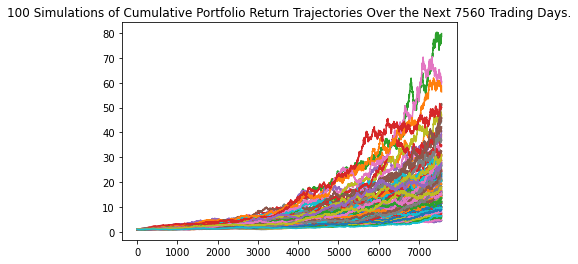

In [84]:
# Plot simulation outcomes
MC_forty_sixty.plot_simulation()

#line_plot = MC_SPY.plot_simulation()
#line_plot = MC_AAG.plot_simulation()

In [85]:
# Plot probability distribution and confidence intervals
MC_forty_sixty.plot_distribution

<bound method MCSimulation.plot_distribution of <MCForecastTools.MCSimulation object at 0x00000234B9B9E5C8>>

### Retirement Analysis

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
forty_sixty_tbl = MC_forty_sixty.summarize_cumulative_return()

# Print summary statistics
print(forty_sixty_tbl)


count           100.000000
mean             20.623707
std              13.404831
min               4.421416
25%              11.811490
50%              16.369362
75%              25.615390
max              79.772193
95% CI Lower      5.187959
95% CI Upper     53.839983
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [87]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(forty_sixty_tbl[8]*initial_investment,2)
ci_upper = round(forty_sixty_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $103759.18 and $1076799.67


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [88]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(forty_sixty_tbl[8]*initial_investment,2)
ci_upper = round(forty_sixty_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $155638.77 and $1615199.5


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [89]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [90]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [91]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [92]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [93]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [94]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")